# Variational Autoencoder

## Setup

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/gdrive/')

# Add folder to load python modules
ROOT_PATH = '/content/gdrive/My Drive/Colab Notebooks'

import sys, os
sys.path.append(os.path.join(ROOT_PATH, 'bayesian_methods/notebooks'))
sys.path.append(os.path.join(ROOT_PATH, 'bayesian_methods/notebooks/modules'))

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import tensorflow as tf
print("TensorFlow Version: " + str(tf.__version__))

import numpy as np
import time

from variational_autoencoder import VAE, Encoder, Decoder, Plotter
from loss_function import compute_loss
from data_loader import get_mnist, get_vortex_data

TensorFlow Version: 2.3.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
###### Choose 'True' to import and use Tensorboard ######
IMPORT_TENSORBOARD = False

if IMPORT_TENSORBOARD:
  %load_ext tensorboard
  !rm -rf ./logs/
  import tensorboard
  tensorboard.__version__
  from datetime import datetime

  current_time = datetime.now().strftime("%Y%m%d-%H%M%S")
  train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
  test_log_dir = 'logs/gradient_tape/' + current_time + '/test'
  train_summary_writer = tf.summary.create_file_writer(train_log_dir)
  test_summary_writer = tf.summary.create_file_writer(test_log_dir)

### Training Configuration

In [ ]:
###### Set training configuration ######
epochs = 5
lr = 0.001
loss_fn = compute_loss

###### Choose dataset ######
names = ['mnist', 'fashion_mnist', 'vortex']

dataset = names[1]

if dataset=='vortex':
  batch_size = 12
  latent_dim = 3
elif dataset=='fashion_mnist' or dataset=='mnist':
  batch_size = 32
  latent_dim = 2
else:
  print("Error: Dataset selection.")

print("++++ SETUP ++++:")
print()
print("Dataset: {}".format(dataset))
print("Batch size: {}".format(batch_size))
print("Dimension latent space: {}".format(latent_dim))

++++ SETUP ++++:

Dataset: fashion_mnist
Batch size: 32
Dimension latent space: 2


## Load Data

In [ ]:
###### Load datasets and set sizes & shapes ######
if dataset=='vortex':
  train_ds, test_ds, train_shape, test_shape = get_vortex_data(os.path.join(ROOT_PATH, 'data/U.h5'), batch_size=batch_size)
  train_size = train_shape[0]
  test_size = test_shape[0]
  img_shape = (train_shape[1], train_shape[2], train_shape[3])

if dataset=='fashion_mnist' or dataset=='mnist':
  (x_train, y_train), (x_test, y_test) = get_mnist(batch_size=batch_size, asarray=True, dataset=dataset)
  train_ds, test_ds, train_shape, test_shape = get_mnist(batch_size=batch_size, asarray=False, dataset=dataset)

  img_shape = (train_shape[1], train_shape[2], train_shape[3])

  (digit_size, digit_size, num_channels) = img_shape
  train_size = train_shape[0]
  test_size = test_shape[0]

print()
print("Train Size: {}".format(train_size))
print("Test Size: {}".format(test_size))
print("Image shape: {}".format(img_shape))


Load Fashion MNIST
Return as Arrays

Load Fashion MNIST
Return as Datasets

Train Size: 60000
Test Size: 10000
Image shape: (28, 28, 1)


# Convolutional VAE


In [ ]:
###### Initialize encoder, decoder, VAE ######
encoder_conv = Encoder(inp_shape=img_shape, latent_dim=latent_dim, net='conv')
decoder_conv = Decoder(outp_shape=img_shape, latent_dim=latent_dim, net='conv')

vae_conv = VAE(encoder_conv, decoder_conv, loss_fn)


++++ VARIATIONAL AUTOENCODER ++++

conv-Encoder
 - Input Shape: (28, 28, 1)
 - Latent Variable Space: 2

conv-Decoder
 - Latent Variable Space: 2
 - Output Shape: (28, 28, 1)

Initialize Metrics:
 - train_loss
 - train_accuracy
 - test_loss
 - test_accuracy


Progress:
Epoch 5/5, Loss: 201.54, Accuracy: 100.00, Test Loss: 200.95, Test Accuracy: 100.00, Time: 4.89 s


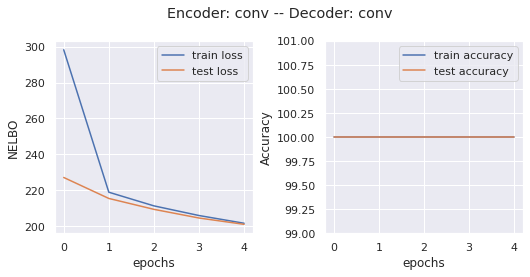

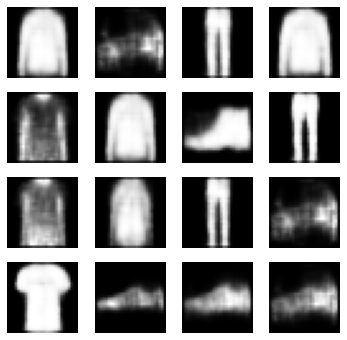


Reset Metrics


In [ ]:
if IMPORT_TENSORBOARD:
  vae_conv.train_summary_writer = train_summary_writer
  vae_conv.test_summary_writer = test_summary_writer

###### Training ######
vae_conv.fit(train_ds, test_ds, epochs=epochs, save=False)

# Multilayer Perceptron VAE

In [ ]:
###### Initialize encoder, decoder, VAE ######
encoder_mlp = Encoder(inp_shape=img_shape, latent_dim=latent_dim, net='mlp')
decoder_mlp = Decoder(outp_shape=img_shape, latent_dim=latent_dim, net='mlp')

vae_mlp = VAE(encoder_mlp, decoder_mlp, loss_fn)


++++ VARIATIONAL AUTOENCODER ++++

mlp-Encoder
 - Input Shape: (28, 28, 1)
 - Latent Variable Space: 2

mlp-Decoder
 - Latent Variable Space: 2
 - Output Shape: (28, 28, 1)

Initialize Metrics:
 - train_loss
 - train_accuracy
 - test_loss
 - test_accuracy


Progress:
Epoch 5/5, Loss: 205.85, Accuracy: 100.00, Test Loss: 205.96, Test Accuracy: 100.00, Time: 3.06 s


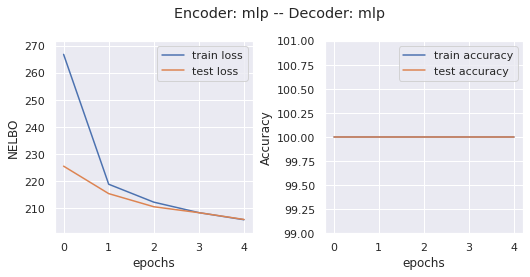

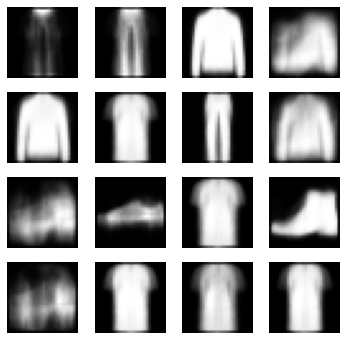


Reset Metrics


In [ ]:
###### Training ######
vae_mlp.fit(train_ds, test_ds, epochs=epochs, save=False)

In [ ]:
###### If selected, show Tensorboard ######
if IMPORT_TENSORBOARD: 
  %tensorboard --logdir logs/gradient_tape

# Results

## Sampling New Data
### Convolutional VAE

In [ ]:
###### Used in debugging phase ######
#from importlib import reload
#import variational_autoencoder
#reload(variational_autoencoder)
#from variational_autoencoder import Plotter

In [ ]:
n_samples = 20

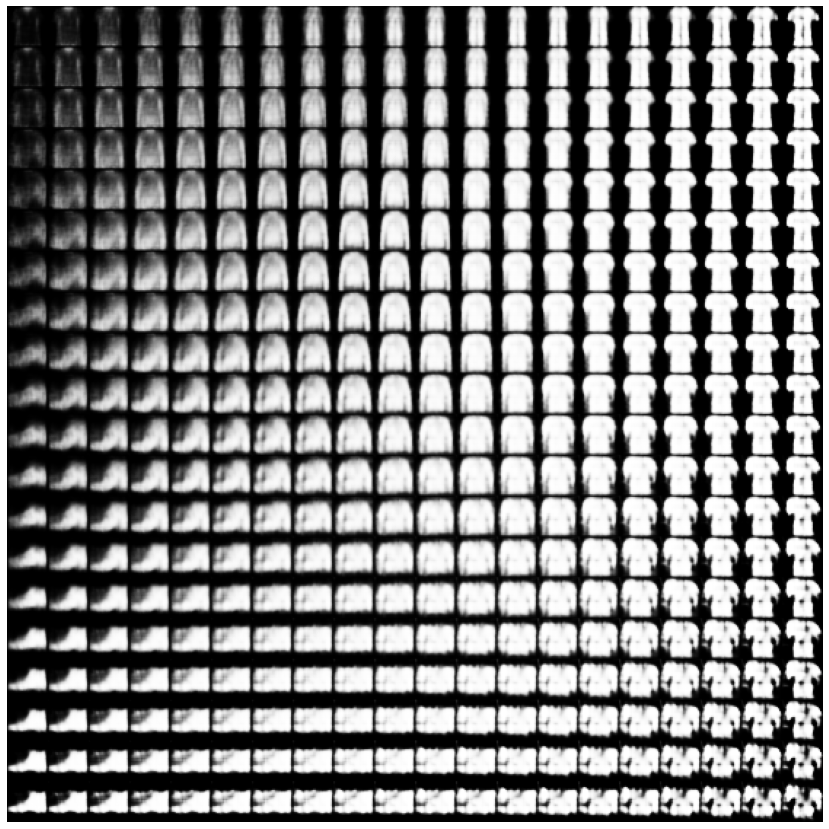

In [ ]:
###### Plot samples drawn from grid in 2-dim probability space ######
plotter = Plotter()

if latent_dim == 2:
  plotter.latent_space_grid(vae_conv, n_samples=n_samples, img_shape=img_shape)

### Multilayer Perceptron VAE


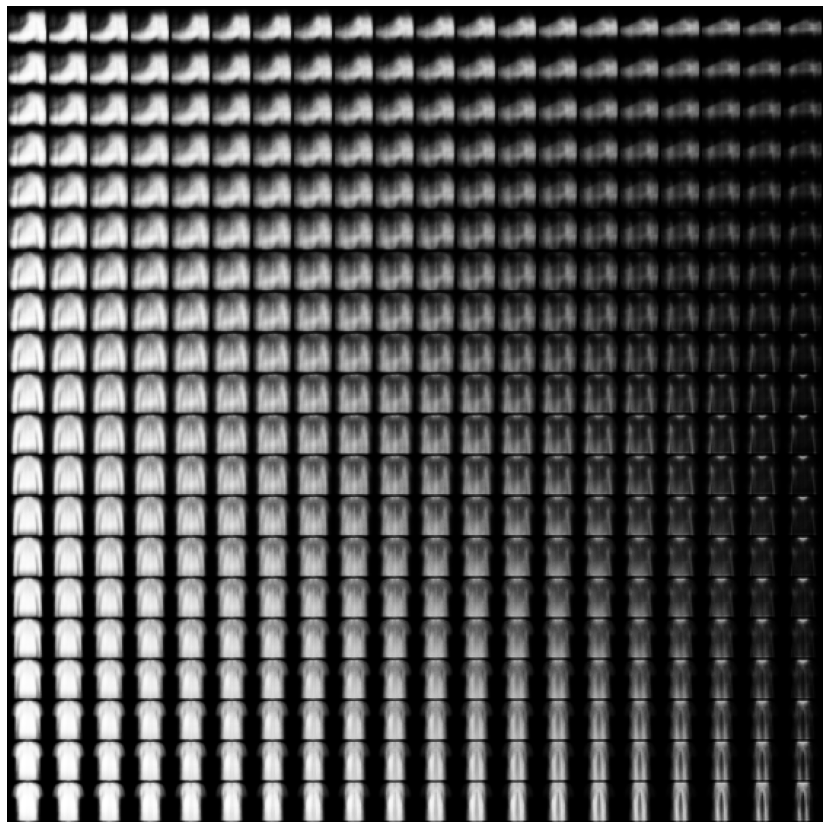

In [ ]:
if latent_dim==2:
  plotter.latent_space_grid(vae_mlp, n_samples=n_samples, img_shape=img_shape)

### Latent Space Embedding

In [ ]:
plotter.plot_embedding(cae_conv, x_test, y_test)

NameError: ignored

In [ ]:
plotter.plot_embedding(vae_mlp, x_test, y_test)

# Conditional VAE

In [ ]:
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model

In [ ]:
label_width = 10
img_length = img_shape[0]*img_shape[1]*img_shape[2]
cond_latent_dim = latent_dim+label_width

x = Input(batch_shape=(batch_size, img_length))
label = Input(batch_shape=(batch_size, label_width))

cond_encoder = Encoder(latent_dim=latent_dim, net='mlp')
cond_decoder = Decoder(net='mlp')

cond_loss_fn = lambda x, y: loss_fn

cond_vae = VAE(cond_encoder, cond_decoder, cond_loss_fn, conditional=True)

x_out, mu, var = cond_vae(concatenate([x, label]), logits=True)

cvae = Model(inputs=[x, label], outputs=mu)

cvae.compile(optimizer=tf.keras.optimizers.Adam(lr=lr), loss=lambda x, y: conditional_loss)

In [ ]:
hist = cvae.fit(x=[tf.keras.layers.Reshape(x_train, (batch_size, img_length)), y_train],
                y=x_train,
                shuffle=True,
                epochs=epochs,
                batch_size=batch_size,
                validation_data=([x_test, y_test], x_test),
                verbose=2)